<a href="https://colab.research.google.com/github/rohitpan/datasciencecoursera/blob/master/DS_Concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Matrix A:
[[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
   1.57921282  0.76743473 -0.46947439  0.54256004]
 [-0.46341769 -0.46572975  0.24196227 -1.91328024 -1.72491783 -0.56228753
  -1.01283112  0.31424733 -0.90802408 -1.4123037 ]
 [ 1.46564877 -0.2257763   0.0675282  -1.42474819 -0.54438272  0.11092259
  -1.15099358  0.37569802 -0.60063869 -0.29169375]
 [-0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
   0.2088636  -1.95967012 -1.32818605  0.19686124]
 [ 0.73846658  0.17136828 -0.11564828 -0.3011037  -1.47852199 -0.71984421
  -0.46063877  1.05712223  0.34361829 -1.76304016]
 [ 0.32408397 -0.38508228 -0.676922    0.61167629  1.03099952  0.93128012
  -0.83921752 -0.30921238  0.33126343  0.97554513]
 [-0.47917424 -0.18565898 -1.10633497 -1.19620662  0.81252582  1.35624003
  -0.07201012  1.0035329   0.36163603 -0.64511975]
 [ 0.36139561  1.53803657 -0.03582604  1.56464366 -2.6197451   0.8219025
   0.08704707 -0.29900735  0.0917

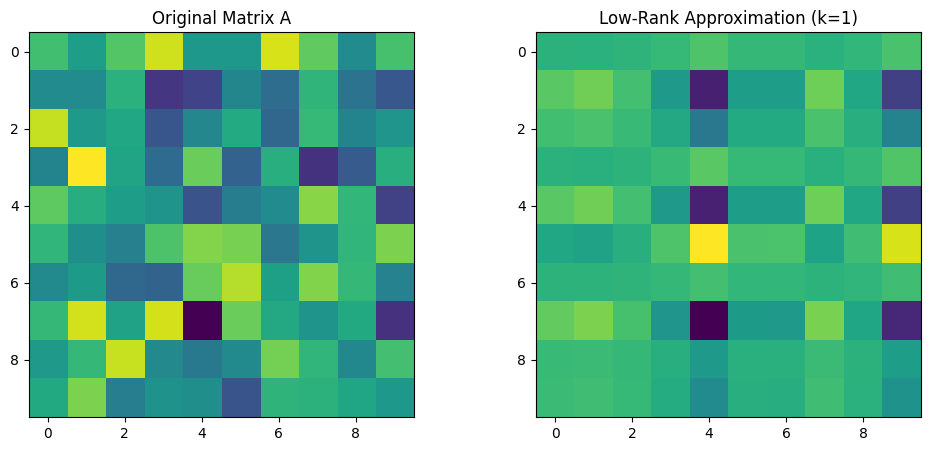

Frobenius norm of difference for k=1: 7.477398289520079


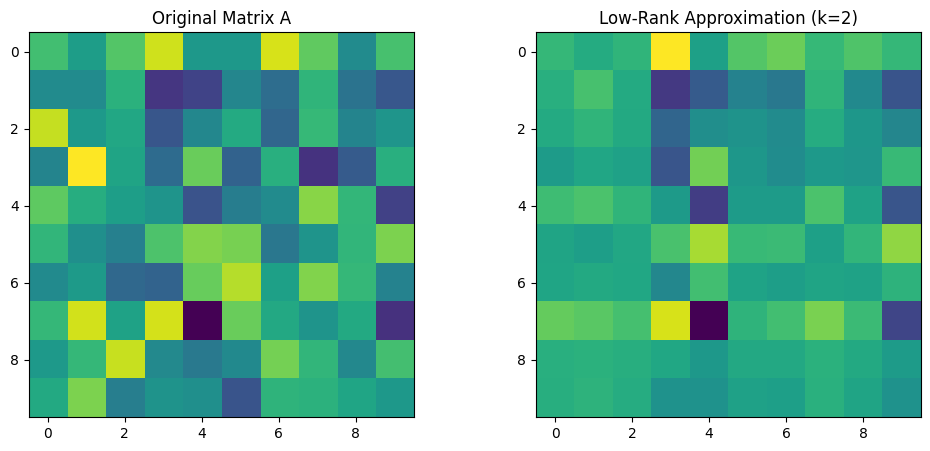

Frobenius norm of difference for k=2: 6.1532951901919475


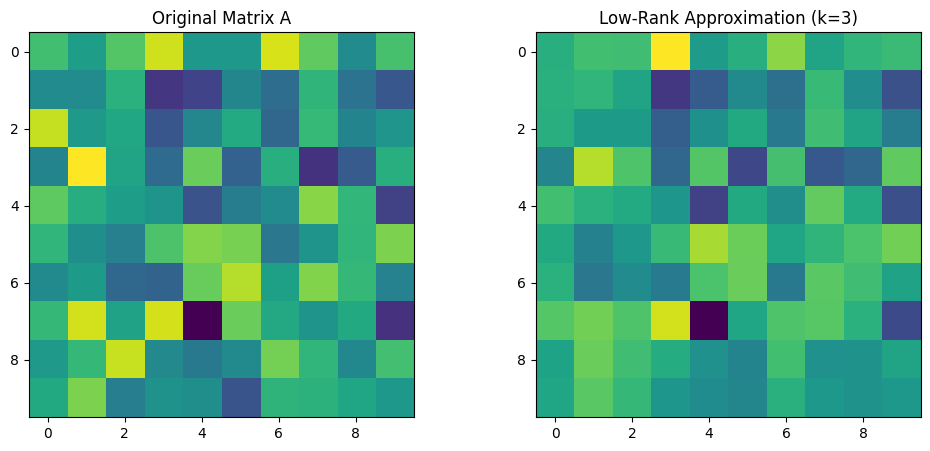

Frobenius norm of difference for k=3: 4.630970541326217


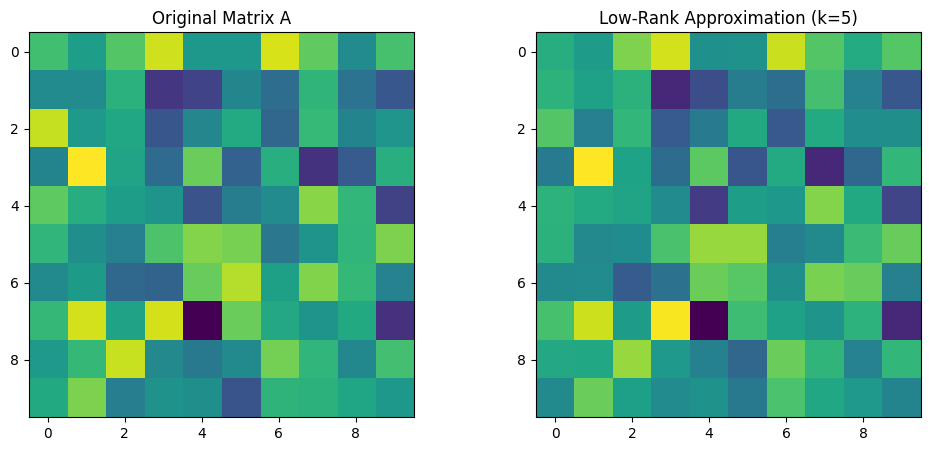

Frobenius norm of difference for k=5: 2.7554553297425834


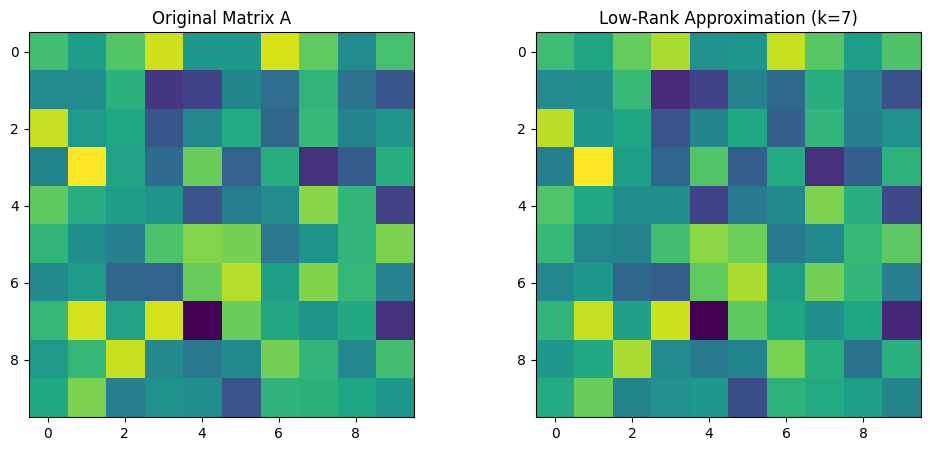

Frobenius norm of difference for k=7: 1.1368662940542036


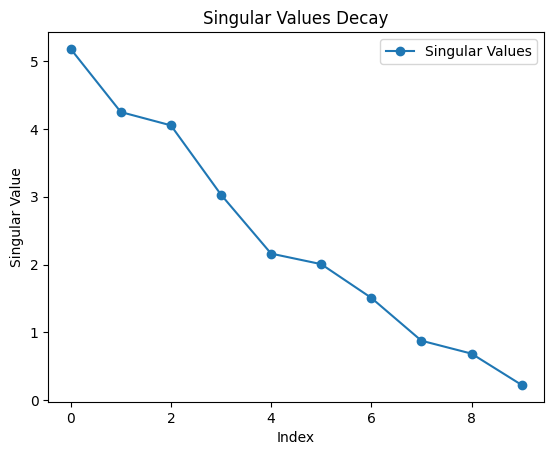

In [1]:
# Principle component analysis
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Function to display matrices
def plot_matrices(A, B, title_A="Original Matrix", title_B="Approximation"):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    axs[0].imshow(A, cmap='viridis')
    axs[0].set_title(title_A)

    axs[1].imshow(B, cmap='viridis')
    axs[1].set_title(title_B)

    plt.show()

# 1. Create a random matrix (e.g., 10x10 matrix)
np.random.seed(42)
A = np.random.randn(10, 10)

print("Original Matrix A:")
print(A)

# 2. Perform Singular Value Decomposition (SVD)
U, S, VT = np.linalg.svd(A, full_matrices=False)

print("\nSingular values (S):")
print(S)

# 3. Create a diagonal matrix of singular values
Sigma = np.diag(S)

# 4. Low-rank approximation using top-k singular values
def low_rank_approximation(A, k):
    """ Return a low-rank approximation of matrix A using top-k singular values. """
    U, S, VT = np.linalg.svd(A, full_matrices=False)
    S_k = np.diag(S[:k])  # Keep only the top-k singular values
    U_k = U[:, :k]
    VT_k = VT[:k, :]

    A_k = U_k @ S_k @ VT_k  # Low-rank approximation
    return A_k

# Try low-rank approximations with different ranks
k_values = [1, 2, 3, 5, 7]

for k in k_values:
    A_k = low_rank_approximation(A, k)
    plot_matrices(A, A_k, title_A="Original Matrix A", title_B=f"Low-Rank Approximation (k={k})")
    # Print the Frobenius norm of the difference (approximation error)
    print(f"Frobenius norm of difference for k={k}: {np.linalg.norm(A - A_k)}")

# 5. Plot the singular values to observe decay
plt.plot(S, 'o-', label='Singular Values')
plt.title("Singular Values Decay")
plt.xlabel("Index")
plt.ylabel("Singular Value")
plt.legend()
plt.show()



Original Data (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Standardized Data (first 5 rows):
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


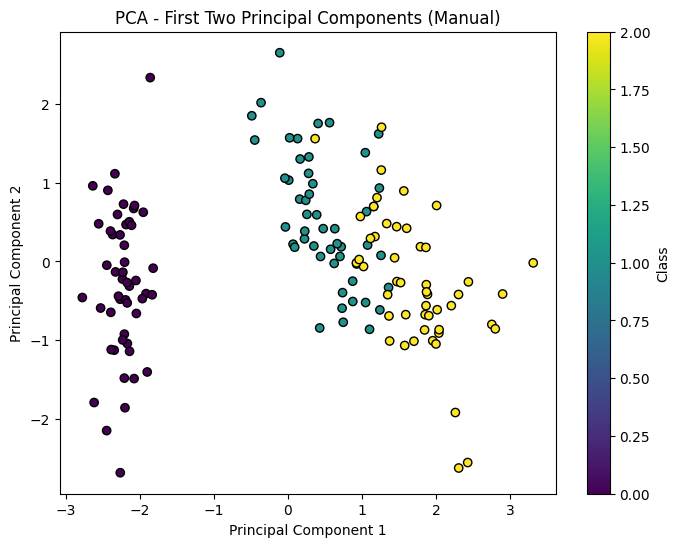

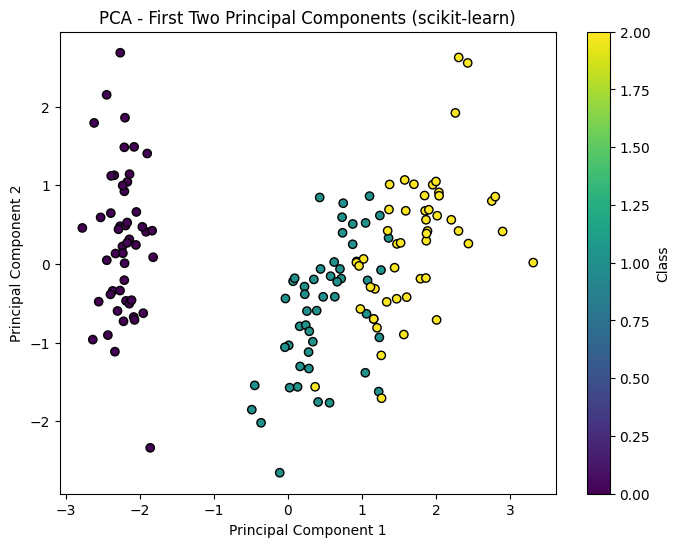


Explained Variance (Manual):
[0.72962445 0.22850762]

Explained Variance (scikit-learn):
[0.72962445 0.22850762]


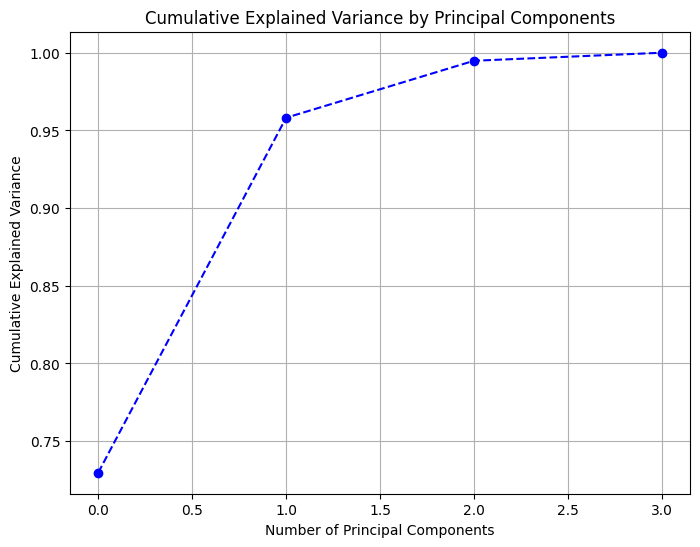


Cumulative Explained Variance (sklearn):
[0.72962445 0.95813207 0.99482129 1.        ]


In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import pandas as pd

# 1. Generate or Load Dataset

# We'll use the Iris dataset as an example
data = load_iris()
X = data.data  # Features (150 samples, 4 features)
y = data.target  # Labels

# Convert to a DataFrame for visualization
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

print("Original Data (first 5 rows):")
print(df.head())

# 2. Standardize the data
# PCA works better when data is standardized
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nStandardized Data (first 5 rows):")
print(X_scaled[:5])

# 3. Manual PCA implementation using numpy

# Step 1: Compute the covariance matrix
cov_matrix = np.cov(X_scaled.T)

# Step 2: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 3: Sort the eigenvalues and corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in decreasing order
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Step 4: Project the data onto the first two principal components
n_components = 2
eigenvector_subset = sorted_eigenvectors[:, :n_components]  # Top 2 eigenvectors
X_reduced_manual = np.dot(X_scaled, eigenvector_subset)  # Project data

# Plot the first two principal components (manual PCA)
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced_manual[:, 0], X_reduced_manual[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('PCA - First Two Principal Components (Manual)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()

# 4. PCA using scikit-learn
pca = PCA(n_components=2)
X_reduced_sklearn = pca.fit_transform(X_scaled)

# Plot the first two principal components (scikit-learn PCA)
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced_sklearn[:, 0], X_reduced_sklearn[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('PCA - First Two Principal Components (scikit-learn)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()

# 5. Explained Variance

# Manual calculation
explained_variance_manual = sorted_eigenvalues[:n_components] / np.sum(sorted_eigenvalues)
print("\nExplained Variance (Manual):")
print(explained_variance_manual)

# Using scikit-learn
explained_variance_sklearn = pca.explained_variance_ratio_
print("\nExplained Variance (scikit-learn):")
print(explained_variance_sklearn)

# 6. Cumulative Explained Variance Plot

# Get explained variance for all components using scikit-learn PCA
pca_full = PCA(n_components=4)
pca_full.fit(X_scaled)
explained_variance_full = pca_full.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_full), marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

print("\nCumulative Explained Variance (sklearn):")
print(np.cumsum(explained_variance_full))
